Loaded training data: (16512, 9), (16512,)
Loaded testing data: (4128, 9), (4128,)
Training linear_regression...
linear_regression - RMSE: 0.7110, MAE: 0.5111, R²: 0.6143
Model saved to ../models\linear_regression.pkl
Training decision_tree...
decision_tree - RMSE: 0.7087, MAE: 0.4562, R²: 0.6167
Model saved to ../models\decision_tree.pkl
Training random_forest...
random_forest - RMSE: 0.5062, MAE: 0.3285, R²: 0.8045
Model saved to ../models\random_forest.pkl
Training xgboost...
xgboost - RMSE: 0.4607, MAE: 0.3061, R²: 0.8380
Model saved to ../models\xgboost.pkl

Best model: xgboost with RMSE: 0.4607
Performing hyperparameter tuning for xgboost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Tuned xgboost - RMSE: 0.4542, MAE: 0.2967, R²: 0.8426
Tuned model saved to ../models\xgboost_tuned.pkl
Final Model - RMSE: 0.4542, MAE: 0.2967, R²: 0.8426

Feature Importance:
1. MedInc -

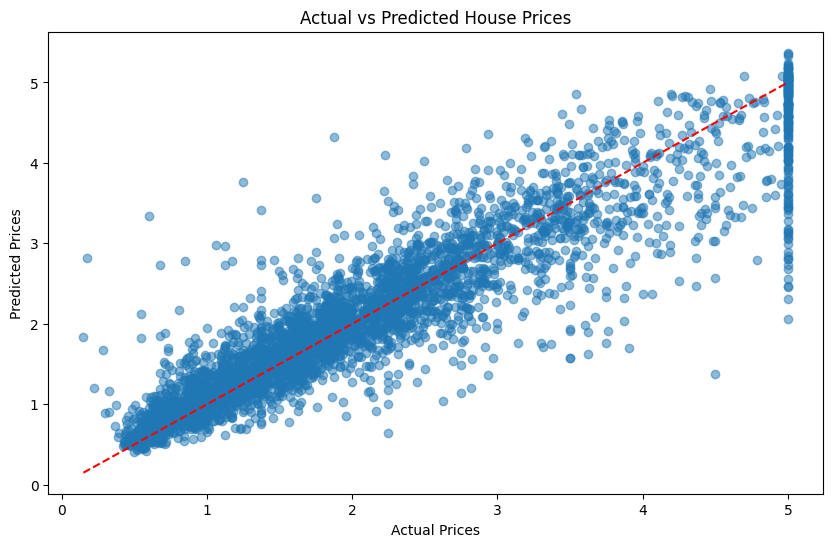

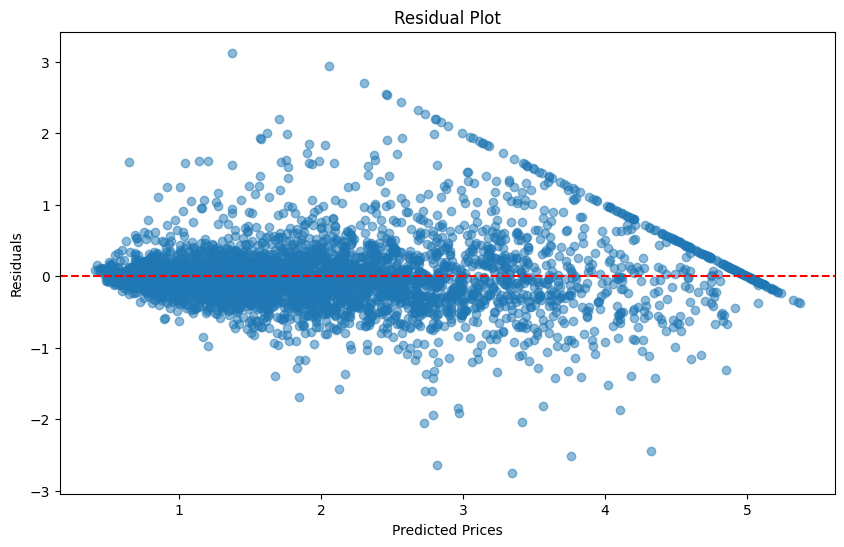

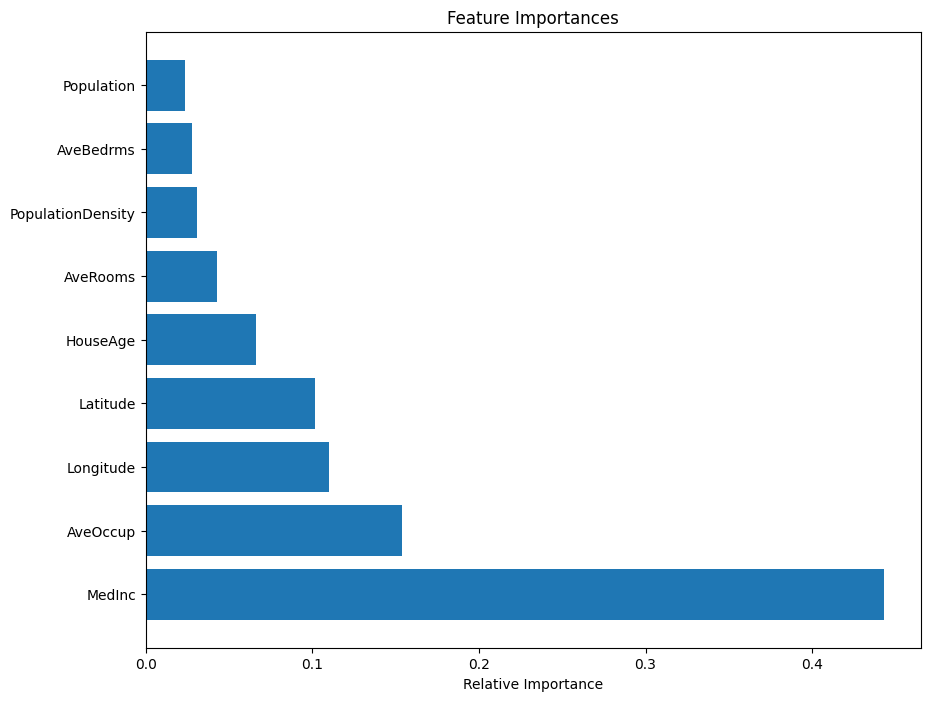

In [1]:
import sys
import os
sys.path.append('../')  # Add parent directory to path

from src.training.model_trainer import ModelTrainer

# Initialize the model trainer
trainer = ModelTrainer(
    train_file='../data/processed/train.csv',
    test_file='../data/processed/test.csv',
    models_dir='../models'
)

# Train and optimize models
best_model, results = trainer.train_and_optimize()

# Print final results
print("\nBest Model:", results['model_name'])
print("RMSE:", results['evaluation']['rmse'])
print("MAE:", results['evaluation']['mae'])
print("R² Score:", results['evaluation']['r2'])

# Check the feature importance (if available)
if results['feature_importance']:
    print("\nTop 3 important features:")
    sorted_importance = sorted(
        results['feature_importance'].items(), 
        key=lambda x: x[1], 
        reverse=True
    )
    for feature, importance in sorted_importance[:3]:
        print(f"{feature}: {importance:.4f}")